# Imports

In [4]:
# import data from mat
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import dlib
import glob
from math import cos, sin
import os
# from PIL import image, ImageFilter
import pandas as pd

# Methods

# Testing the graph function
    I might need to make a class for this, but we continue with functions for now.

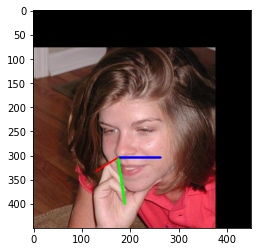

In [ ]:
path = 'resources/300W-3D/AFW/134212_1.jpg'
show_image(path)

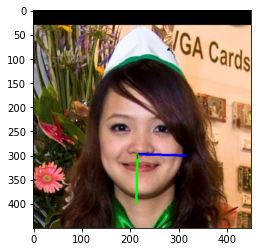

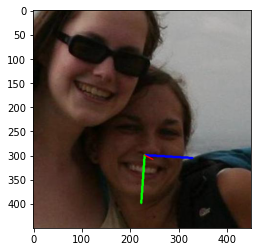

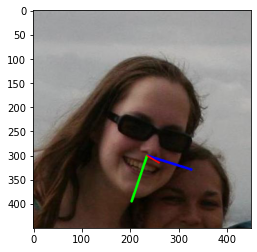

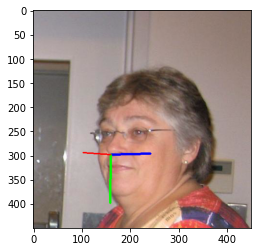

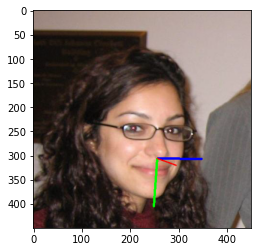

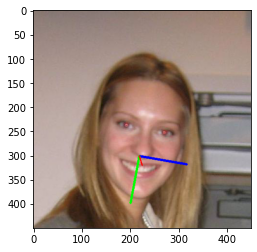

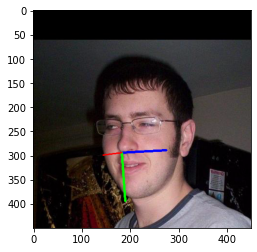

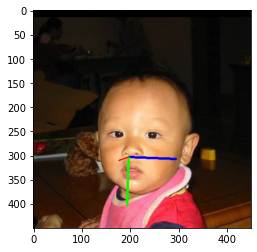

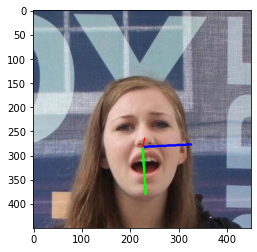

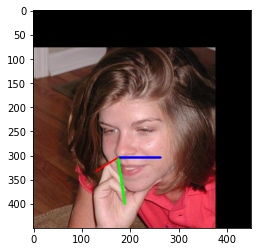

In [ ]:
# collect all the image paths in a list
pathes_list = glob.glob('resources/300W-3D/*/*.jpg')
# loop through the list and show the image
for path in pathes_list[:10]:
    show_image(path)

In [16]:
# read_mat function to return pitch, yaw, roll
def read_mat(path):
    # remove the .jpg extension
    path = path.split('.jpg')[0]
    # add the .mat extension
    path = path + '.mat'
    data = sio.loadmat(path)
    landmarks = data['pt2d']
    labels = data['Pose_Para'][0][:3]
    pitch, yaw, roll = labels
    return landmarks, pitch, -yaw, roll

In [17]:
# draw the pose axis on the image, and return the image
# tdx, tdy are for the nose position in x, y
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [18]:
def show_image(path):
    capture = cv2.VideoCapture(path)
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    
    landmarks, pitch, yaw, roll = read_mat(path)
    nose_x, nose_y = landmarks[0,32], landmarks[1,32]
    plt.imshow(draw_axis(frame, yaw, pitch, roll, nose_x, nose_y))
    plt.show()

    capture.release()
    cv2.destroyAllWindows()

# Building dataframe

In [87]:
path = 'resources/300W-3D/AFW/134212_1.jpg'
landmarks, pitch, yaw, roll = read_mat(path)
# landmarks_x consists of strings from 0 to 67
landmarks_x = ['x' + str(i) for i in range(landmarks.shape[1])]
landmarks_y = ['y' + str(i) for i in range(landmarks.shape[1])]
features = landmarks_x + landmarks_y
labels = ['pitch', 'yaw', 'roll']
df = pd.DataFrame(columns = features + labels)
# flaten the landmarks into multiple values and add to the dataframe
row = landmarks.reshape(1, -1)
row = np.append(row, [pitch, yaw, roll]).reshape(1, -1)
df2 =pd.DataFrame(row, columns = features + labels)
df = df.append(df2)
df = df.append(df2)
df
# df = df.append({'i': 0, 'x': landmarks[0,0], 'y': landmarks[1,0], 'pitch': pitch, 'yaw': yaw, 'roll': roll}, ignore_index=True)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y61,y62,y63,y64,y65,y66,y67,pitch,yaw,roll
0,146.54238,145.752561,145.450561,150.843792,158.701006,169.934688,181.669886,191.612485,208.36239,231.391445,...,324.347931,326.102769,326.062097,324.148812,330.72572,330.825927,327.885199,-0.317657,-0.468922,-0.150363
0,146.54238,145.752561,145.450561,150.843792,158.701006,169.934688,181.669886,191.612485,208.36239,231.391445,...,324.347931,326.102769,326.062097,324.148812,330.72572,330.825927,327.885199,-0.317657,-0.468922,-0.150363


In [90]:
# collect all the image paths in a list
pathes_list = glob.glob('resources/300W-3D/*/*.jpg')
# loop through the list and add into a dataframe consisting of image landmarks and pitch, yaw, roll
shape_range = landmarks.shape[1] # make sure you run previous cell first
landmarks_x = ['x' + str(i) for i in range(shape_range)]
landmarks_y = ['y' + str(i) for i in range(shape_range)]
features = landmarks_x + landmarks_y
labels = ['pitch', 'yaw', 'roll']
df = pd.DataFrame(columns = features + labels)

for path in pathes_list:
    # could be improved by using multiprocessing, and refactorin
    landmarks, pitch, yaw, roll = read_mat(path)
    row = landmarks.reshape(1, -1)
    row = np.append(row, [pitch, yaw, roll]).reshape(1, -1)
    df2 =pd.DataFrame(row, columns = features + labels)
    df = df.append(df2)

df.reset_index(inplace=True, drop=True)
df
    

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y61,y62,y63,y64,y65,y66,y67,pitch,yaw,roll
0,137.131548,138.219077,141.162951,144.049601,153.839403,169.398562,185.249147,203.102626,223.765354,246.283391,...,323.619450,323.851491,324.139044,322.304625,324.139044,323.851491,323.619450,-0.087918,-0.004180,0.026582
1,141.769893,138.459303,137.912676,140.004508,148.008710,162.480345,181.071586,201.062743,223.462633,245.822590,...,320.691863,323.085223,324.413919,328.236300,340.795691,340.787596,337.519432,-0.097263,0.171060,0.078350
2,150.983519,145.699115,139.394020,137.527394,142.319544,153.948619,167.562914,188.181612,213.674801,235.299164,...,314.325847,318.967712,322.425834,329.859872,339.274024,337.448844,333.128718,-0.153185,0.245730,0.337030
3,141.256805,138.612570,137.019304,140.165430,145.591995,152.018071,158.294746,166.905470,179.378353,197.734341,...,324.887376,325.436777,325.805694,327.359755,325.805694,325.436777,324.887376,0.049726,-0.608852,0.005448
4,136.409768,136.537016,138.012407,142.317380,152.091359,168.452441,191.586805,215.973470,243.434602,266.773406,...,331.316085,331.640298,331.139022,329.367325,331.139022,331.640298,331.316085,-0.155008,0.399067,0.074495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,137.477922,140.322587,145.004330,151.406677,157.410661,166.953803,183.937669,201.824484,228.487234,254.215693,...,334.504095,335.283158,332.768541,328.037343,332.768541,335.283158,334.504095,-0.094009,-0.166907,-0.168874
3833,137.212308,138.417467,147.193430,149.082307,155.515616,165.400751,177.007272,186.563665,209.033253,234.349085,...,329.326186,330.290313,327.873910,323.472378,327.873910,330.290313,329.326186,-0.084151,-0.242622,-0.078441
3834,139.306397,140.661847,144.058214,150.270052,161.539585,182.756261,207.843797,224.719158,245.786749,261.630053,...,308.768863,310.063691,308.229620,308.769878,326.542869,328.907638,329.180412,-0.146421,0.234853,0.044059
3835,136.644660,144.185406,153.634062,166.538750,176.892116,191.307446,214.485980,242.892889,264.242263,283.947499,...,337.211476,334.937656,328.739694,319.174212,328.739694,334.937656,337.211476,-0.220850,0.076772,-0.255706


In [109]:
# split the dataframe into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[labels], test_size=0.2, random_state=42)
# split y_train into pitch, yaw, roll
y_train_pitch = y_train['pitch']
y_train_yaw = y_train['yaw']
y_train_roll = y_train['roll']
# split y_test into pitch, yaw, roll
y_test_pitch = y_test['pitch']
y_test_yaw = y_test['yaw']
y_test_roll = y_test['roll']

# Building a model

In [116]:
# Import xgboost regression model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

model1 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, seed=42).fit(X_train, y_train_pitch)
model2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, seed=42).fit(X_train, y_train_yaw)
model3 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, seed=42).fit(X_train, y_train_roll)

In [119]:
# Test the model
y_pred_pitch = model1.predict(X_test)
y_pred_yaw = model2.predict(X_test)
y_pred_roll = model3.predict(X_test)

In [164]:
# Evaluate the model
print('Pitch:')
print('Mean Squared Error:', mean_squared_error(y_test_pitch, y_pred_pitch))
print('R2 Score:', r2_score(y_test_pitch, y_pred_pitch))
print('Mean Absolute Error:', mean_absolute_error(y_test_pitch, y_pred_pitch))
print('Explained Variance Score:', explained_variance_score(y_test_pitch, y_pred_pitch))

print("\n Yaw:")
print('Mean Squared Error:', mean_squared_error(y_test_yaw, y_pred_yaw))
print('R2 Score:', r2_score(y_test_yaw, y_pred_yaw))
print('Mean Absolute Error:', mean_absolute_error(y_test_yaw, y_pred_yaw))
print('Explained Variance Score:', explained_variance_score(y_test_yaw, y_pred_yaw))

print("\n Roll:")
print('Mean Squared Error:', mean_squared_error(y_test_roll, y_pred_roll))
print('R2 Score:', r2_score(y_test_roll, y_pred_roll))
print('Mean Absolute Error:', mean_absolute_error(y_test_roll, y_pred_roll))
print('Explained Variance Score:', explained_variance_score(y_test_roll, y_pred_roll))

Pitch:
Mean Squared Error: 0.001960385339719024
R2 Score: 0.9295889665402618
Mean Absolute Error: 0.03198074288672716
Explained Variance Score: 0.9298054717266577

 Yaw:
Mean Squared Error: 0.0007265198578174833
R2 Score: 0.9911143184874832
Mean Absolute Error: 0.019320874899548566
Explained Variance Score: 0.9911145036912136

 Roll:
Mean Squared Error: 0.0007475397401123041
R2 Score: 0.96766126351727
Mean Absolute Error: 0.018635123098928612
Explained Variance Score: 0.9677199168059023


# Graphing the model

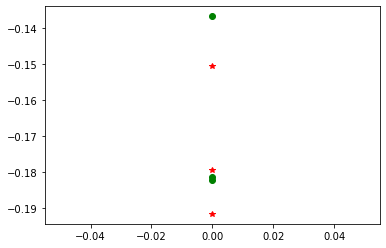

In [165]:
# choose random image from the list
import random
random_path = random.choice(pathes_list)
landmarks, pitch, yaw, roll = read_mat(random_path)
# turn the landmarks into a numpy array
landmarks_ = np.array(landmarks).reshape(1, -1)
# predict the pitch, yaw, roll
pitch_pred = model1.predict(landmarks_)
yaw_pred = model2.predict(landmarks_)
roll_pred = model3.predict(landmarks_)
# plot the predicted and actual values
plt.plot(pitch, 'go')
plt.plot(pitch_pred, 'r*')
plt.plot(yaw, 'go')
plt.plot(yaw_pred, 'r*')
plt.plot(roll, 'go')
plt.plot(roll_pred, 'r*')
plt.show()

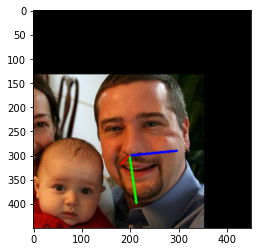

In [166]:
# plot actual values
show_image(random_path)

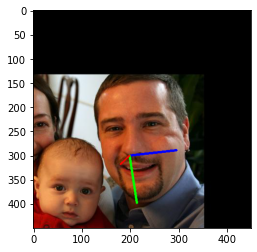

In [167]:
# plot predicted values
capture = cv2.VideoCapture(random_path)
ret, frame = capture.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
nose_x, nose_y = landmarks[0,32], landmarks[1,32]
plt.imshow(draw_axis(frame, yaw_pred, pitch_pred, roll_pred, nose_x, nose_y))
plt.show()